In [56]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import shutil
import glob

In [57]:
dirname_grad = "../org+adv/grad/"
dirname_adv = "../org+adv/adv/"
for i in [4]:
    for j in range(1, sum(os.path.isfile(os.path.join(dirname_grad + str(i), name)) for name in os.listdir(dirname_grad + str(i))) + 1):
        for k in range(10):
            if os.path.isfile(dirname_adv + "{}/{}→{}/{}.png".format(i, i, k, j)) == False:
                    continue
            shutil.copy(dirname_grad + "4/{}.png".format(j), "../org+adv/4_heatmap/{}".format(k))

for i in range(10):
    if i == 4:
        continue
    flist = glob.glob("../org+adv/4_heatmap/{}/*.png".format(i))    #ソースの写真群がある場所    
    sums = cv2.imread(flist.pop()).astype(np.uint32)
    for fname in flist:
        sums += cv2.imread(fname)
    cv2.imwrite("../org+adv/{}.png".format(i), (sums/(len(flist)+1)))    #平均化
    

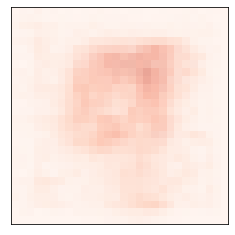

In [58]:
for i in range(10):
    if i == 4:
        continue
    img = Image.open("../org+adv/{}.png".format(i))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(img)
    plt.savefig("../org+adv/{}.png".format(i))